In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

import matplotlib
matplotlib.rcParams["figure.dpi"] = 100

In [11]:
def plot(
    log_files, 
    metrics={'acc': 'Accuracy', 'val_loss': 'Validation loss'},
):
    target = log_files[0].split('.')[-3]
    
    for m in metrics.items():
        for log_file in sorted(log_files):
            df = pd.read_csv(log_file)
            plt.plot(df['iter'], df[m[0]], label=log_file)

        plt.title(m[1] + ' on ' + target)
        plt.legend()
        plt.show()

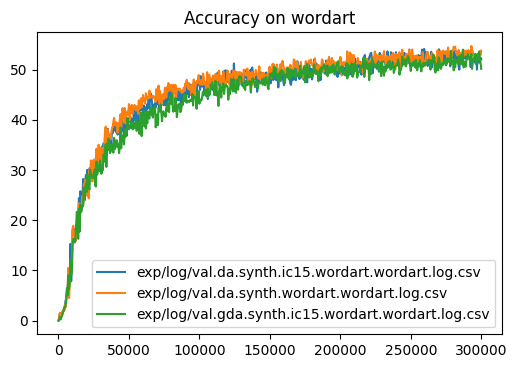

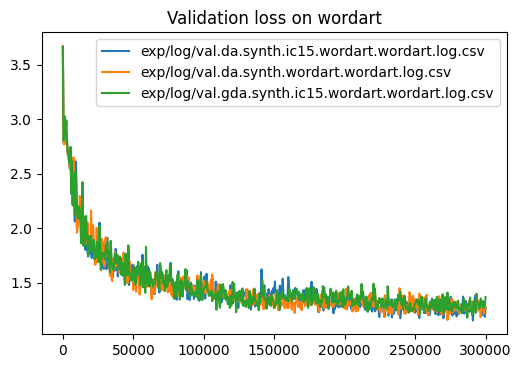

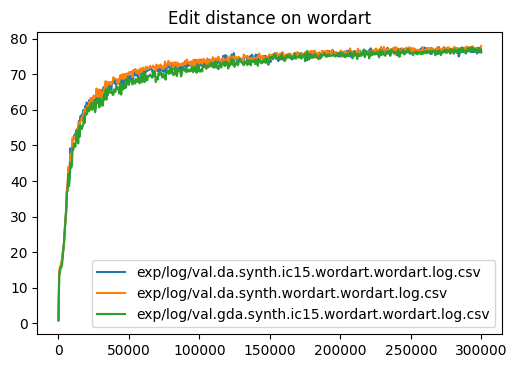

In [14]:
plot(
    log_files = [
        'exp/log/val.da.synth.wordart.wordart.log.csv',
        'exp/log/val.da.synth.ic15.wordart.wordart.log.csv',
        'exp/log/val.gda.synth.ic15.wordart.wordart.log.csv',
    ],
    metrics = {
        'accuracy': 'Accuracy',
        'val_loss': 'Validation loss',
        'edit_distance': 'Edit distance',
    }
)

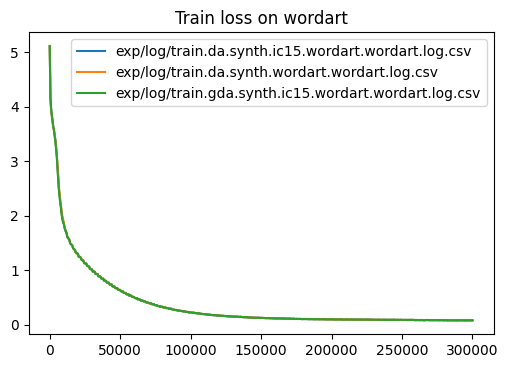

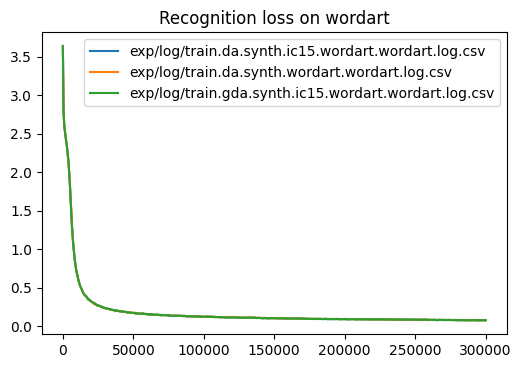

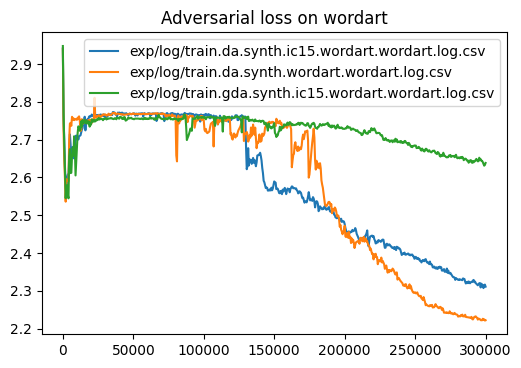

In [15]:
plot(
    log_files = [
        'exp/log/train.da.synth.wordart.wordart.log.csv',
        'exp/log/train.da.synth.ic15.wordart.wordart.log.csv',
        'exp/log/train.gda.synth.ic15.wordart.wordart.log.csv',
    ],
    metrics = {
        'train_loss': 'Train loss',
        'cls_loss': 'Recognition loss',
        'sim_loss': 'Adversarial loss',
    }
)

In [3]:
def plot_bars(
    log_files,
    datasets=[
        'IIIT5k_3000', 'SVT', 'IC03_860', 'IC03_867', 'IC13_857',
        'IC13_1015', 'IC15_1811', 'IC15_2077', 'SVTP', 'CUTE80',
        'FUNSD', 'IAM', 'WordArt',
    ],
):
    ind = np.arange(len(datasets))
    width = 1 / (len(log_files) + 1)
    bars = []
    for i, log_file in enumerate(sorted(log_files)):
        metrics = []
        df = pd.read_csv(log_file)
        bar = plt.bar(ind + width*i, df['accuracy'], width)
        bars.append(bar)
        
    plt.xticks(ind, datasets, fontsize=10, rotation=45)
    plt.ylim((0,120))
    
    legends = [
        log_file.split('/')[-2].split('_')[-3]
        for log_file in log_files
    ]
    plt.legend(bars, legends)
    plt.title("Test accuracy on public benchmarks")
    plt.show()

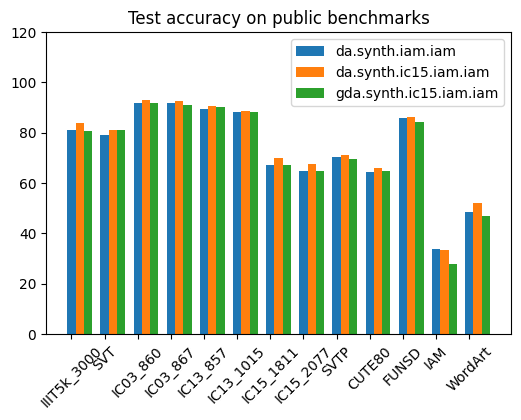

In [6]:
plot_bars([
    'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_da.synth.iam.iam_iter_300000.pth/log_all_evaluation.csv',
    'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_da.synth.ic15.iam.iam_iter_300000.pth/log_all_evaluation.csv',
    'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_gda.synth.ic15.iam.iam_iter_300000.pth/log_all_evaluation.csv',
    # 'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_da.synth.wordart.wordart_iter_300000.pth/log_all_evaluation.csv',
    # 'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_da.synth.ic15.wordart.wordart_iter_300000.pth/log_all_evaluation.csv',
    # 'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_gda.synth.ic15.wordart.wordart_iter_300000.pth/log_all_evaluation.csv',
])

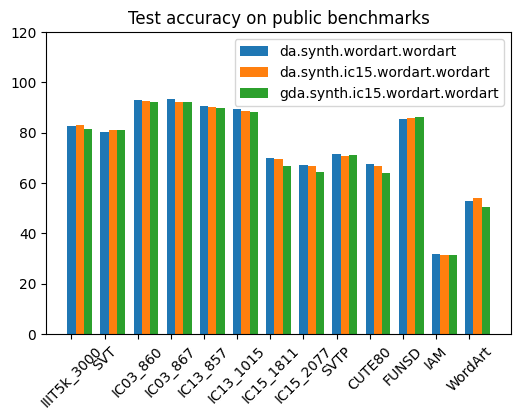

In [53]:
plot_bars([
    'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_da.synth.wordart.wordart_iter_300000.pth/log_all_evaluation.csv',
    'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_da.synth.ic15.wordart.wordart_iter_300000.pth/log_all_evaluation.csv',
    'result/exp_saved_models_TPS-ResNet-BiLSTM-Attn-Seed1111_gda.synth.ic15.wordart.wordart_iter_300000.pth/log_all_evaluation.csv',
])